# Demo EEFxTMS_2F (equatorial electric field)

> Authors: Ashley Smith
>
> Abstract: Access to the equatorial electric field (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2020-03-30T17:07:55+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.6.1
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

request = SwarmRequest()

## EEFxTMS_2F product information

Dayside equatorial electric field, sampled at every dayside equator crossing +- 20mins


Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#EEFxTMS_2F

### Check what "EEF" data variables are available

In [3]:
request.available_collections("EEF", details=False)

{'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F', 'SW_OPER_EEFCTMS_2F']}

In [4]:
request.available_measurements("EEF")

['EEF', 'EEJ', 'RelErr', 'Flags']

## Fetch all the EEF and EEJ values from Bravo during 2016

In [5]:
request.set_collection("SW_OPER_EEFBTMS_2F")
request.set_products(measurements=["EEF", "EEJ", "Flags"])
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2017,1,1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (3.829MB)


In [6]:
# The first three and last three source (daily) files
data.sources[:3], data.sources[-3:]

(['SW_OPER_EEFBTMS_2F_20160101T000000_20160101T235959_0202',
  'SW_OPER_EEFBTMS_2F_20160102T000000_20160102T235959_0202',
  'SW_OPER_EEFBTMS_2F_20160103T000000_20160103T235959_0202'],
 ['SW_OPER_EEFBTMS_2F_20161229T000000_20161229T235959_0202',
  'SW_OPER_EEFBTMS_2F_20161230T000000_20161230T235959_0202',
  'SW_OPER_EEFBTMS_2F_20161231T000000_20161231T235959_0202'])

In [7]:
df = data.as_dataframe()
df.head()

,EEJ,Spacecraft,EEF,Latitude,Longitude,Flags
Timestamp,,,,,,
2016-01-01 00:54:18.582250118,"[-73.9058933834286, -60.119316737080155, -46.6...",B,-0.404049,6.975170,113.561284,0
2016-01-01 02:29:05.999249935,"[-47.515084792419216, -42.82800146349508, -38....",B,-0.192766,7.496394,89.780549,0
2016-01-01 04:03:53.439625025,"[3.7369192994853857, 3.996975027730879, 4.2560...",B,-0.111505,6.906655,65.997987,0
2016-01-01 05:38:40.856781244,"[-3.279921085036325, -2.621850109601278, -1.96...",B,-0.182436,7.550620,42.216807,0
2016-01-01 07:13:28.198117256,"[0.7535334919061705, 1.5255172026993797, 2.296...",B,-0.071939,10.599299,18.433600,0


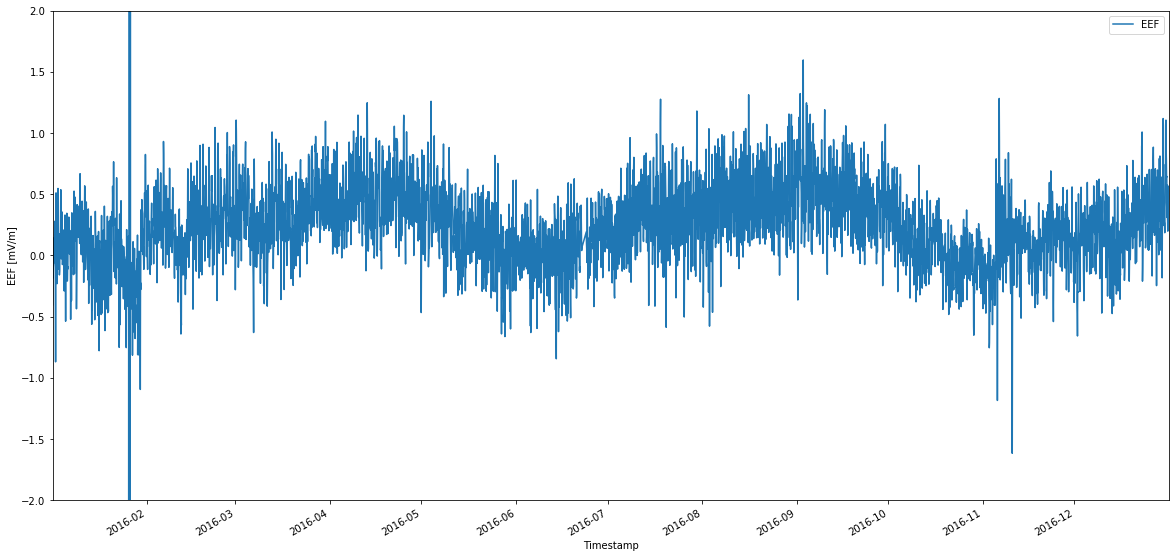

In [8]:
ax = df.plot(y="EEF", figsize=(20,10))
ax.set_ylim((-2, 2));
ax.set_ylabel("EEF [mV/m]");

Take a look at the time jumps between entries... Nominally the product should produce one measurement "every dayside equator crossing ±20 minutes"

In [9]:
times = df.index
delta_t_minutes = [t.seconds/60 for t in np.diff(times.to_pydatetime())]
print("Range of time gaps (in minutes) between successive measurements:")
np.unique(np.sort(delta_t_minutes))

Range of time gaps (in minutes) between successive measurements:


array([ 47.3       ,  47.46666667,  94.73333333,  94.75      ,
        94.76666667,  94.78333333, 142.2       , 189.48333333,
       189.5       , 189.51666667, 189.53333333, 189.55      ,
       189.56666667, 644.81666667])

## Access the EEJ estimate via xarray instead of pandas

Since the EEJ estimate has both time and latitude dimensions, it is not suited to pandas. Here we load the data as a `xarray.Dataset` which better handles n-dimensional data.

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (EEJ_QDLat: 81, Timestamp: 5501)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:54:18.582250118 ... 2016-12-31T23:20:18.164109468
  * EEJ_QDLat   (EEJ_QDLat) float64 -20.0 -19.5 -19.0 -18.5 ... 19.0 19.5 20.0
Data variables:
    Spacecraft  (Timestamp) object 'B' 'B' 'B' 'B' 'B' ... 'B' 'B' 'B' 'B' 'B'
    Latitude    (Timestamp) float64 6.975 7.496 6.907 ... -7.274 -3.876 -1.002
    Flags       (Timestamp) uint16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Longitude   (Timestamp) float64 113.6 89.78 66.0 ... -105.5 -129.2 -153.0
    EEF         (Timestamp) float64 -0.404 -0.1928 -0.1115 ... 0.4749 0.5629
    EEJ         (Timestamp, EEJ_QDLat) float64 -73.91 -60.12 ... -7.573 -9.667
Attributes:
    Sources:         ['SW_OPER_EEFBTMS_2F_20160101T000000_20160101T235959_020...
    MagneticModels:  []
    RangeFilters:    []

Let's select a subset (one month) and visualise it:

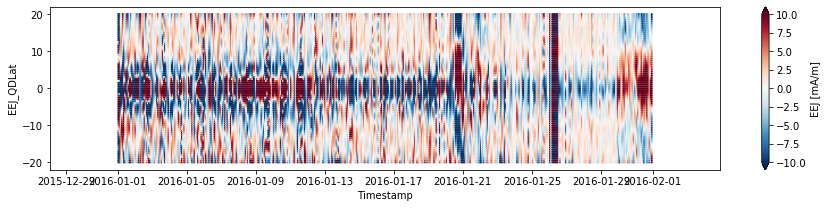

In [11]:
_ds = ds.sel({"Timestamp": "2016-01"})

fig, ax1 = plt.subplots(nrows=1, figsize=(15,3), sharex=True)
_ds.plot.scatter(x="Timestamp", y="EEJ_QDLat", hue="EEJ", vmax=10, s=1, ax=ax1)